In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from scipy import stats
from sklearn import metrics 
from datetime import datetime, timedelta
import csv
import mysql.connector


D:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mydb = mysql.connector.connect(
  host="TW100103289",       # 数据库主机地址
#    host="TW100102221",       # 数据库主机地址
  user="root",    # 数据库用户名
  passwd="l5cv0",   # 数据库密码
  database="l5cv0",auth_plugin='mysql_native_password'
)

In [3]:
Update_daytime=150

abbrno ='6P'

In [4]:
endtime = datetime.now() - timedelta(days=2/24)
starttime = datetime.now() - timedelta(days=2/24)- timedelta(days=Update_daytime) 
Update_time = " AND t.REPORTTIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.REPORTTIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"

In [5]:
Sqla =  " select t.REPORTTIME  AS  xml_mea_time,"
Sqla = Sqla + " t.INFORVALUE22  AS  xml_mea_tool,"
Sqla = Sqla + " t.INFORVALUE17 AS xml_start_time,"
#Sqla = Sqla + " t.INFORVALUE10  AS  xml_tool_id,"
Sqla = Sqla + " t.INFORVALUE5 AS  XML_SHEET_ID,"
Sqla = Sqla + " t.CHARTID,"
Sqla = Sqla + " t.MONITORITEMVALUE AS Y"
Sqla = Sqla + " from l5caryspch_spchis t"
#Sqla = Sqla + " where t.CHARTID = 'B15H6/PEP1/ADI/AHVA_V1_CD1'"
Sqla = Sqla + " where 1 = 1"
Sqla = Sqla + Update_time
#Sqla = Sqla + " and t.REPORTTIME > '2019-11-20 08:00:00'"
Sqla = Sqla + " and t.GRAPHTYPE ='X'"
Sqla = Sqla + " and t.INFORVALUE22 like 'ABMOV%'"
#Sqla = Sqla + " and t.INFORVALUE10 = 'ABIEXL00'"
Sqla = Sqla + " and t.INFORVALUE24 ='GL=ADC'"
Sqla = Sqla + " and t.MONITOR_ITEM_NAME = 'ASVA_V1_CD1_AVE'"
Sqla = Sqla + " and t.CHARTID like '%1/ADI%1'"
Sqla = Sqla + " and t.INFORVALUE9 = '" + abbrno + "'"

df = pd.read_sql_query(Sqla, mydb)

df_Y = df[['XML_SHEET_ID',
           'CHARTID',
           'Y']]

In [6]:
endtime = datetime.now() - timedelta(days=1/24)
starttime = datetime.now() - timedelta(days=1/24)- timedelta(days=Update_daytime) 
#Update_time = " AND t.REPORTTIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.REPORTTIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"
Update_time = " AND t.XML_START_TIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.XML_START_TIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"


Sqla =  " select t.* "
Sqla = Sqla + " from svm_cd_r2r t"
Sqla = Sqla + " where 1=1"
Sqla = Sqla + " and t.XML_OP_ID = 'GL-IEX'"
Sqla = Sqla + " and t.XML_ABBR_NO = '" + abbrno + "'"
#Sqla = Sqla + " and t.XML_TOOL_ID = 'ABIEXL10'"
Sqla = Sqla + Update_time

In [7]:
df = pd.read_sql_query(Sqla, mydb)

In [8]:
df = df.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df = df.drop_duplicates('XML_SHEET_ID')

df_X=df[['XML_SHEET_ID','XML_MODEL_NO' ,
       'XML_TOOL_ID','XML_ABBR_NO',
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG']]

In [9]:
df = pd.merge(df_Y , df_X, on = 'XML_SHEET_ID', how = 'left')

In [10]:
df = df.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df = df.drop_duplicates('XML_SHEET_ID')

df=df[['XML_SHEET_ID','XML_MODEL_NO',
       'XML_TOOL_ID','XML_ABBR_NO','CHARTID',  
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG','Y']]

In [11]:
df.to_csv('CD_DF_ALL.csv')
df = pd.read_csv('CD_DF_ALL.csv')

In [12]:
Sqlb = " SELECT distinct (USL + LSL)/2 as 'cd_target' FROM l5caryspchsn_graph WHERE active_flag = 'Y' and graph_type = 'X' and CHART_ID = '" + df.CHARTID[0] + "'" 

df_cd_target = pd.read_sql_query(Sqlb, mydb)

In [13]:
cd_target = df_cd_target.cd_target[0]

In [14]:
df = df.drop(['XML_SHEET_ID','XML_MODEL_NO','XML_TOOL_ID','XML_ABBR_NO','CHARTID','Unnamed: 0'],axis=1)

In [15]:
trainy_x = df.drop(['Y'],axis=1)
trainy_y = df.Y

trainsp_x = df.drop(['SCANSPEED'],axis=1)
trainsp_y = df.SCANSPEED

In [16]:
model_y = xgb.XGBRegressor()
model_y.fit(trainy_x,trainy_y,eval_metric='mae',verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [17]:
model_sp = xgb.XGBRegressor()
model_sp.fit(trainsp_x,trainsp_y,eval_metric='mae',verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [18]:
interval_day = 2

Sqla =  " select t.* "
Sqla = Sqla + " from svm_cd_r2r t"
Sqla = Sqla + " where 1=1"
Sqla = Sqla + " and t.XML_OP_ID = 'GL-IEX'"
Sqla = Sqla + " and t.XML_ABBR_NO = '" + abbrno + "'"
Sqla = Sqla + " and t.XML_START_TIME >= NOW() - INTERVAL " + str(interval_day) + " DAY "

Sqla

df_now = pd.read_sql_query(Sqla, mydb)

df_now.to_csv('CD_DF_NOW.csv')
df_now = pd.read_csv('CD_DF_NOW.csv')

In [19]:
df_now = df_now.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df_now = df_now.drop_duplicates('XML_SHEET_ID')

df_now=df_now[['XML_SHEET_ID','XML_MODEL_NO' ,
       'XML_TOOL_ID','XML_ABBR_NO',
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG']]


In [20]:
df_now = df_now.drop(['XML_SHEET_ID','XML_MODEL_NO','XML_TOOL_ID','XML_ABBR_NO','SCANSPEED'],axis=1)

In [21]:
#df_now['Y'] = cd_target
df_now['Y'] = 7.3

In [22]:
df_now.columns

Index(['LC_DISPENSQNT', 'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3',
       'LC_NZLSPDMENT', 'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1',
       'SHP_TEMP2', 'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID',
       'SHP_TEMP3', 'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM',
       'DV_SP1PMPFLW', 'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW',
       'DV_CIRPMPFLW', 'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1',
       'DV_PMPFLWR1', 'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2',
       'DV_DWSPFLWRTR2', 'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT',
       'SLOTZFCUS11', 'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX',
       'LPMIN', 'LPAVE', 'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP',
       'AIRD', 'AIRCLN', 'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL',
       'LPILR', 'LPILA', 'LPL', 'LPR', 'ILLM_AVG', 'Y'],
      dtype='object')

[205 204 205 204 204 205 204 207 205 205 205 205 204 207 207 204 205 204
 204 205 205 205 205 205 207 207 205 205 205 204 205 207 207 205 205 207
 205 207 204 205 204 207 207 207 205 205 205 204 207 205 207 205 205 205
 205 205 205 205 204 204 205 205 207 207 205 204 205 205 208 205 205 204
 204 207 207 204 205 205 204 205 207 207 204 205 205 207 207 207 205 205
 205 205 204 205 205 207 204 205 207 205 205 205 205 204 207 207 208 204
 205 204 204 205 205 207 205 207 205 207 205 205 205 205 204 205 205 204
 205 205 205 205 204 204 207 205 205 204 204 205 205 205 205 204 207 205
 207 205 205 204 205 205 204 205 204 207 205 204 205 205 205 205 205 204
 207 204 205 205 204 205 204 205 205 205 205 205 205 205 205 205 205 205
 205 205 205 204 204 205 204 207 205 205 205 205 204 204 204 207 207 204
 204 205 205 204 205 205 207 205 204 205 205 205 205 205 205 205 204 205
 205 204 205 205 204 205 204 205 207 207 205 205 205 205 205 205 204 205
 207 207 205 205 205 204 204 204 205 205 205 204 20

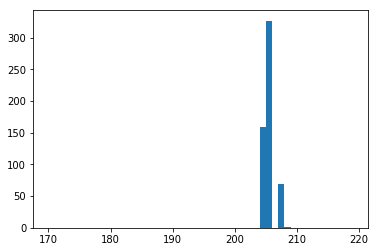

In [23]:
pred_now = model_sp.predict(df_now)
#print(pred_now)
bins = [i for i in range(170,220,1)]
plt.hist(pred_now,bins=bins)
#print(pred_new_scp)
print(pred_now.astype(np.int))
best_node_test = stats.mode(pred_now.astype(np.int))[0][0]
print(best_node_test)

In [24]:
interval_day = 1

Sqla =  " select t.* "
Sqla = Sqla + " from svm_cd_r2r t"
Sqla = Sqla + " where 1=1"
Sqla = Sqla + " and t.XML_OP_ID = 'GL-IEX'"
Sqla = Sqla + " and t.XML_ABBR_NO = '" + abbrno + "'"
Sqla = Sqla + " and t.XML_START_TIME >= NOW() - INTERVAL " + str(interval_day) + " DAY "

Sqla

df_now_vm = pd.read_sql_query(Sqla, mydb)

df_now_vm.to_csv('CD_DF_NOW.csv')
df_now_vm = pd.read_csv('CD_DF_NOW.csv')

In [25]:
df_now_vm = df_now_vm.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df_now_vm = df_now_vm.drop_duplicates('XML_SHEET_ID')

df_now_vm=df_now_vm[['XML_SHEET_ID','XML_MODEL_NO' ,
       'XML_TOOL_ID','XML_ABBR_NO',
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG']]

In [26]:
df_now_vm = df_now_vm.drop(['XML_SHEET_ID','XML_MODEL_NO','XML_TOOL_ID','XML_ABBR_NO'],axis=1)

In [27]:
df_now_vm.columns

Index(['LC_DISPENSQNT', 'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3',
       'LC_NZLSPDMENT', 'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1',
       'SHP_TEMP2', 'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID',
       'SHP_TEMP3', 'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM',
       'DV_SP1PMPFLW', 'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW',
       'DV_CIRPMPFLW', 'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1',
       'DV_PMPFLWR1', 'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2',
       'DV_DWSPFLWRTR2', 'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT',
       'SLOTZFCUS11', 'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX',
       'LPMIN', 'LPAVE', 'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP',
       'AIRD', 'AIRCLN', 'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL',
       'LPILR', 'LPILA', 'LPL', 'LPR', 'SCANSPEED', 'ILLM_AVG'],
      dtype='object')

In [28]:
result = []
i_num = []

for i in range(int(best_node_test-50),int(best_node_test+50),1):
    df_now_vm.SCANSPEED = i
    pred_new_vd = model_y.predict(df_now_vm)
    #result.append(np.mean(pred_new_vd))
    result.append(np.median(pred_new_vd))
    #result.append(stats.mode(pred_new_vd.astype(np.int))[0][0])
    i_num.append(i)

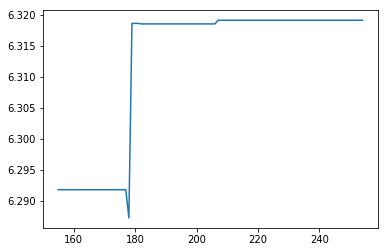

In [29]:
plt.plot(i_num,result)